In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [2]:
#Sis=[ 0, 1, 2, 3, 4, 5,24,25,26,27,28,29,72,73,74,75,76, 77,90,91,92,93,94,95]
#Sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
meas_RCU2L = [0, 1,2,3,4,5]
meas_RCU2H = [6,7,8,9]
SisL = [3*i+j for i in meas_RCU2L for j in range(3)]
SisH = [3*i+j for i in meas_RCU2H for j in range(3)]


In [3]:
#fpath1='xst3_c10m'
fpath1='xst_mean'
fpath2='xst_mean'
files1=listdir(fpath1)#[f for f in listdir(fpath)];
files1.sort()
files1 = [f for f in files1 if isfile(join(fpath1,f))]
files2=listdir(fpath2)#[f for f in listdir(fpath)];
files2.sort()
files2 = [f for f in files2 if isfile(join(fpath2,f))]
print(len(files1),len(files2))
print(files1,files2)
#xst -> no calib
#xst2 -> step+delay, amp 
#xst3 -> all delay, no amp
#xst4 -> correct delay
#xst_t2 -> using t2 calibration

69 69
['xst_mean_2022-10-20-13.npz', 'xst_mean_2022-10-20-14.npz', 'xst_mean_2022-10-20-15.npz', 'xst_mean_2022-10-20-16.npz', 'xst_mean_2022-10-20-17.npz', 'xst_mean_2022-10-20-18.npz', 'xst_mean_2022-10-20-19.npz', 'xst_mean_2022-10-20-22.npz', 'xst_mean_2022-10-20-23.npz', 'xst_mean_2022-10-21-00.npz', 'xst_mean_2022-10-21-01.npz', 'xst_mean_2022-10-21-02.npz', 'xst_mean_2022-10-21-03.npz', 'xst_mean_2022-10-21-04.npz', 'xst_mean_2022-10-21-07.npz', 'xst_mean_2022-10-21-08.npz', 'xst_mean_2022-10-21-09.npz', 'xst_mean_2022-10-21-10.npz', 'xst_mean_2022-10-21-11.npz', 'xst_mean_2022-10-21-12.npz', 'xst_mean_2022-10-21-15.npz', 'xst_mean_2022-10-21-16.npz', 'xst_mean_2022-10-21-17.npz', 'xst_mean_2022-10-21-18.npz', 'xst_mean_2022-10-21-19.npz', 'xst_mean_2022-10-21-20.npz', 'xst_mean_2022-10-21-23.npz', 'xst_mean_2022-10-22-00.npz', 'xst_mean_2022-10-22-01.npz', 'xst_mean_2022-10-22-02.npz', 'xst_mean_2022-10-22-03.npz', 'xst_mean_2022-10-22-04.npz', 'xst_mean_2022-10-22-07.npz', 'xs

In [4]:
D1=[]
Cnt1=[]
#for fn in files1[34+3:35+3]:
#for fn in files1[3:4]:
for fn in files1[4:5]:
    print(fn)
    Dx=np.load(fpath1+"/"+fn)
    D1.append(Dx['xst'])
    Cnt1.append(Dx['cnt'])
#    dates.append(fn.split('.')[0][9:])
D1=np.array(D1)
Cnt1=np.array(Cnt1)
print(D1.shape,Cnt1.shape)
print(Cnt1[:,10])

xst_mean_2022-10-20-17.npz
(1, 512, 30, 30) (1, 512)
[8]


In [6]:
D1b=np.sum(D1[:,:]*Cnt1[:,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt1[:,:],axis=0)[:,np.newaxis,np.newaxis]

Text(0.5, 0, 'Frequency (MHz)')

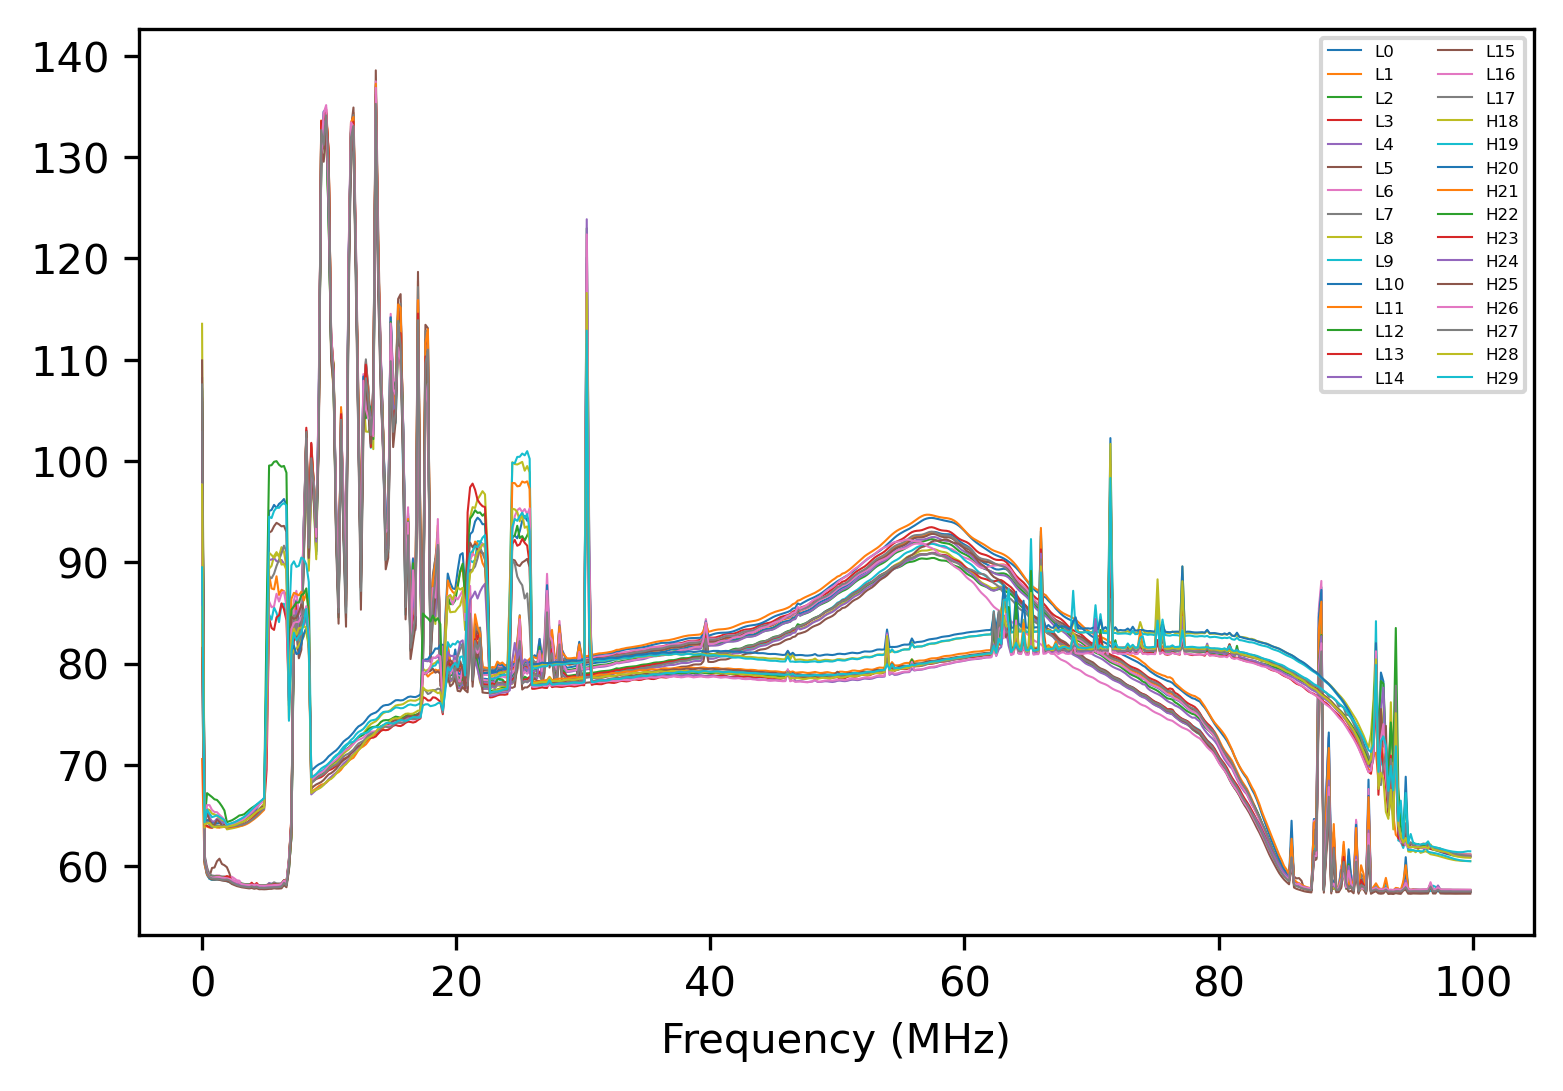

In [11]:
freqL=np.arange(512)/512*100
plt.figure(dpi=300)
for i1 in SisL:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i1,i1],-0)+1e-6),'r-',label='L%i'%(i1),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
for i1 in SisH:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i1,i1],-0)+1e-6),'b-',label='H%i'%(i1),linewidth=0.5)

plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
#plt.ylim(70,90)
plt.xlabel("Frequency (MHz)")

In [13]:
pairs=[[i,j] for i in SisL for j in SisH]
print(pairs)

[[0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [2, 18], [2, 19], [2, 20], [2, 21], [2, 22], [2, 23], [2, 24], [2, 25], [2, 26], [2, 27], [2, 28], [2, 29], [3, 18], [3, 19], [3, 20], [3, 21], [3, 22], [3, 23], [3, 24], [3, 25], [3, 26], [3, 27], [3, 28], [3, 29], [4, 18], [4, 19], [4, 20], [4, 21], [4, 22], [4, 23], [4, 24], [4, 25], [4, 26], [4, 27], [4, 28], [4, 29], [5, 18], [5, 19], [5, 20], [5, 21], [5, 22], [5, 23], [5, 24], [5, 25], [5, 26], [5, 27], [5, 28], [5, 29], [6, 18], [6, 19], [6, 20], [6, 21], [6, 22], [6, 23], [6, 24], [6, 25], [6, 26], [6, 27], [6, 28], [6, 29], [7, 18], [7, 19], [7, 20], [7, 21], [7, 22], [7, 23], [7, 24], [7, 25], [7, 26], [7, 27], [7, 28], [7, 29], [8, 18], [8, 19], [8, 20], [8, 21], [8, 22], [8, 23], [8, 24], [8, 25], [8, 26], [8, 27], [8, 28], [8, 29], [9, 18], [9, 19], [9, 20], 

Text(0.5, 0, 'Frequency (MHz)')

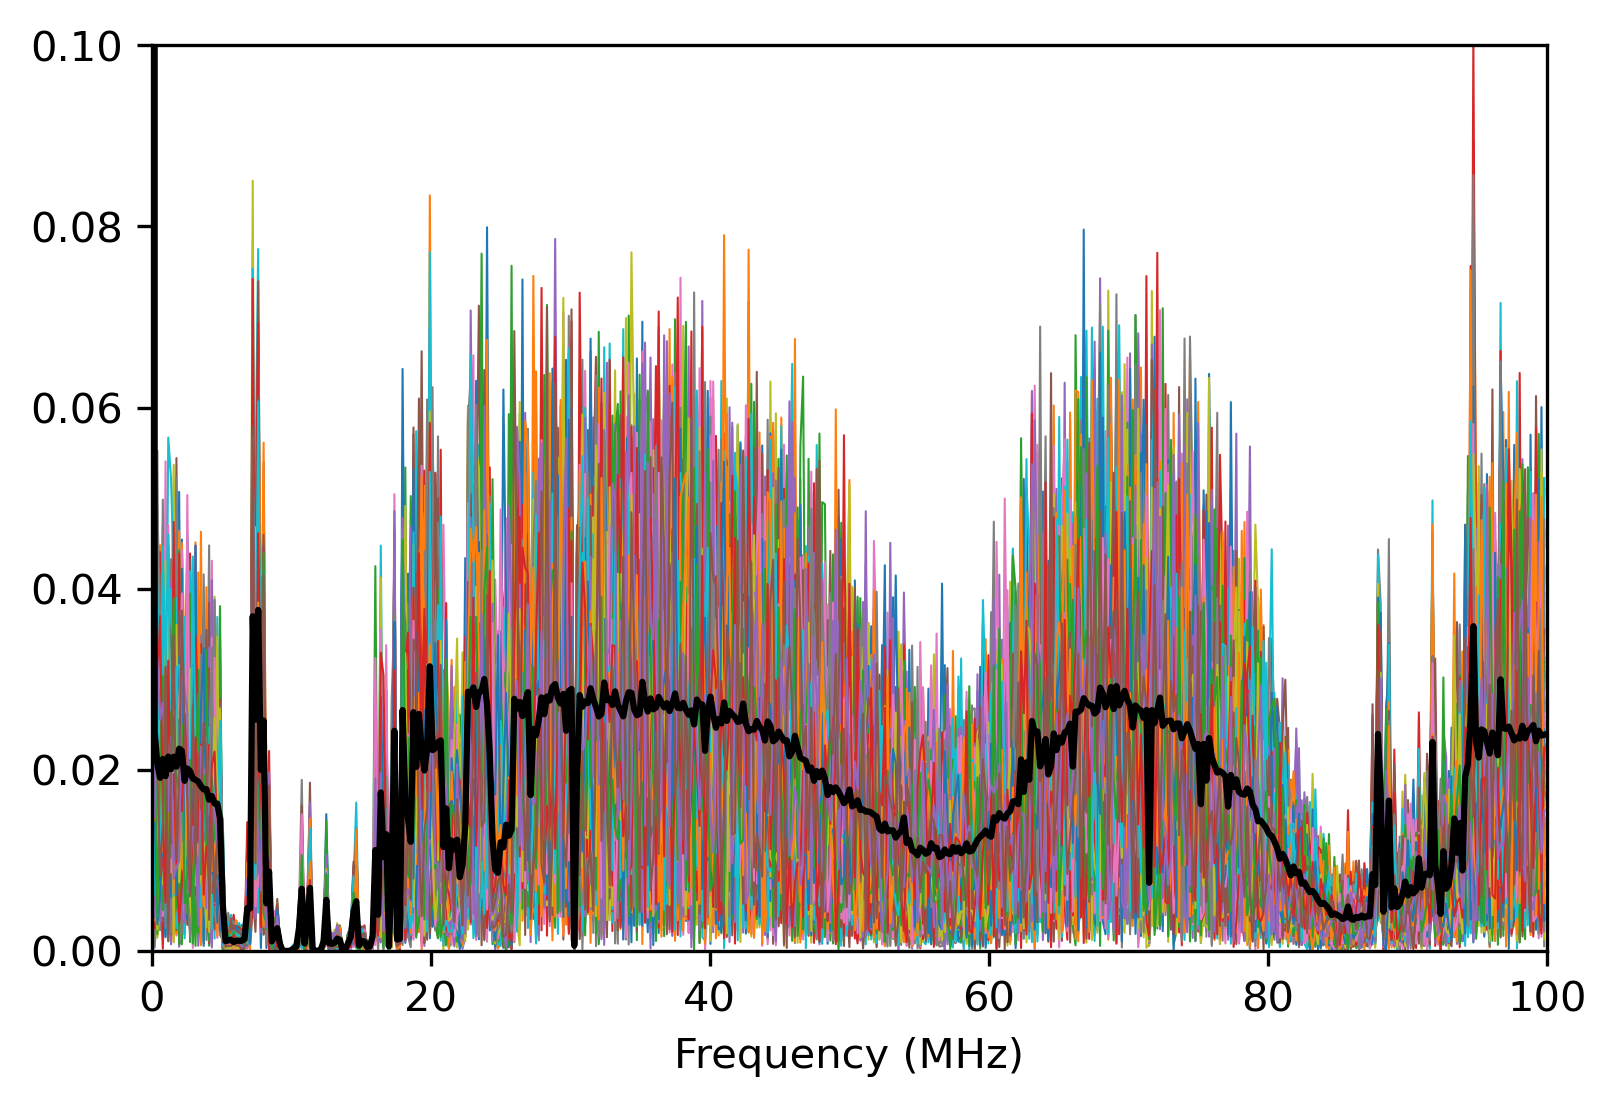

In [23]:
freq=np.arange(512)/512*100
Ct=np.zeros([512])
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[:]):
    C=D1b[:,p2,p1]/np.sqrt(D1b[:,p1,p1].real**2+D1b[:,p2,p2].real**2)
    Ct+=(C*C.conj()).real
    plt.plot(freq,np.abs(100*C),'-',label='%i-%i'%(p1,p2),linewidth=0.5)
Ct=np.sqrt(Ct/len(pairs));
plt.plot(freq,100*Ct,'k-')

#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
plt.ylim(0,0.1)
plt.xlim(0,100)
#plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
#plt.ylim(10,90)
plt.xlabel("Frequency (MHz)")

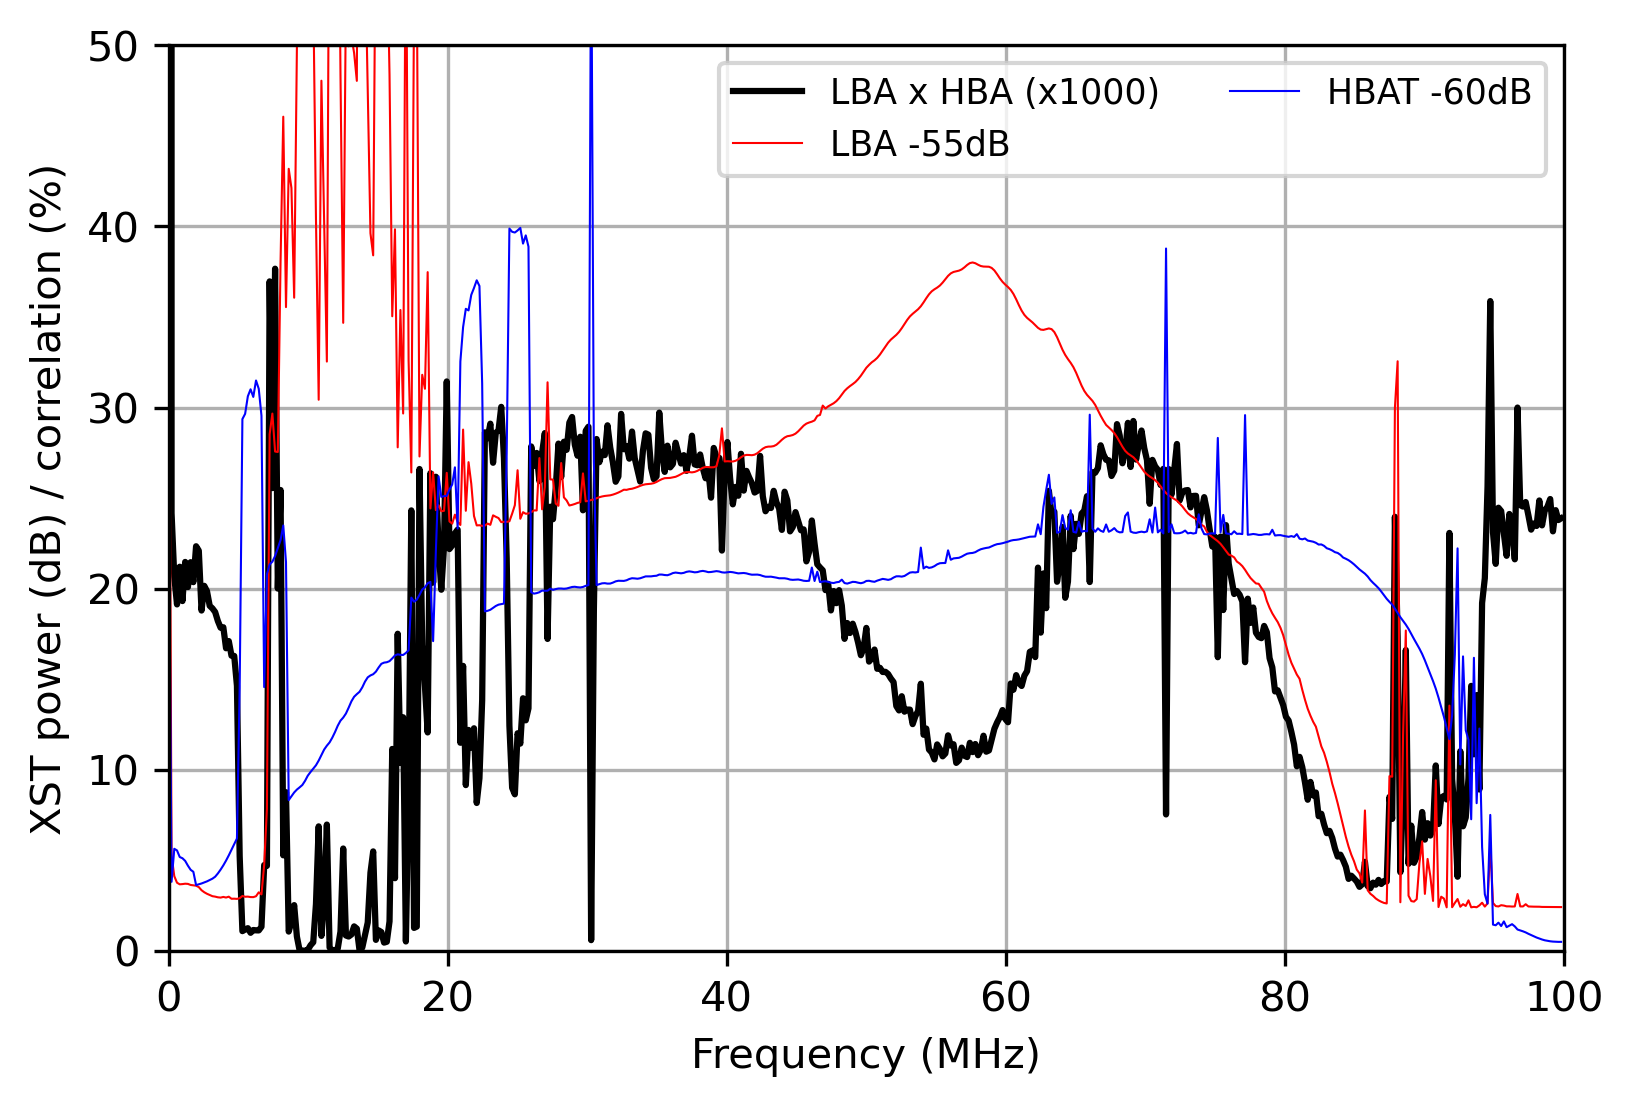

In [61]:
freqL=np.arange(512)/512*100
plt.figure(dpi=300)
plt.plot(freq,1e5*Ct,'k-',label='LBA x HBA (x1000)')
for i1 in SisL[:1]:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i1,i1],-0)+1e-6)-55,'r-',label='LBA -55dB',linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
for i2 in SisH[:1]:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i2,i2],-0)+1e-6)-60,'b-',label='HBAT -60dB',linewidth=0.5)
#scale=(-55-60)/2-10*np.log10(len(pairs))/2+3
#plt.plot(freqL,P2dB(D1b[:,i1,i1]*D1b[:,i2,i2])/2+scale,'m-',label='LBA+HBA %.0fdB'%scale,linewidth=0.5)
print()    
plt.legend(fontsize='small',ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
plt.xlim(0,100)
plt.ylim(0,50)
plt.xlabel("Frequency (MHz)")
plt.ylabel("XST power (dB) / correlation (%)")
plt.grid()

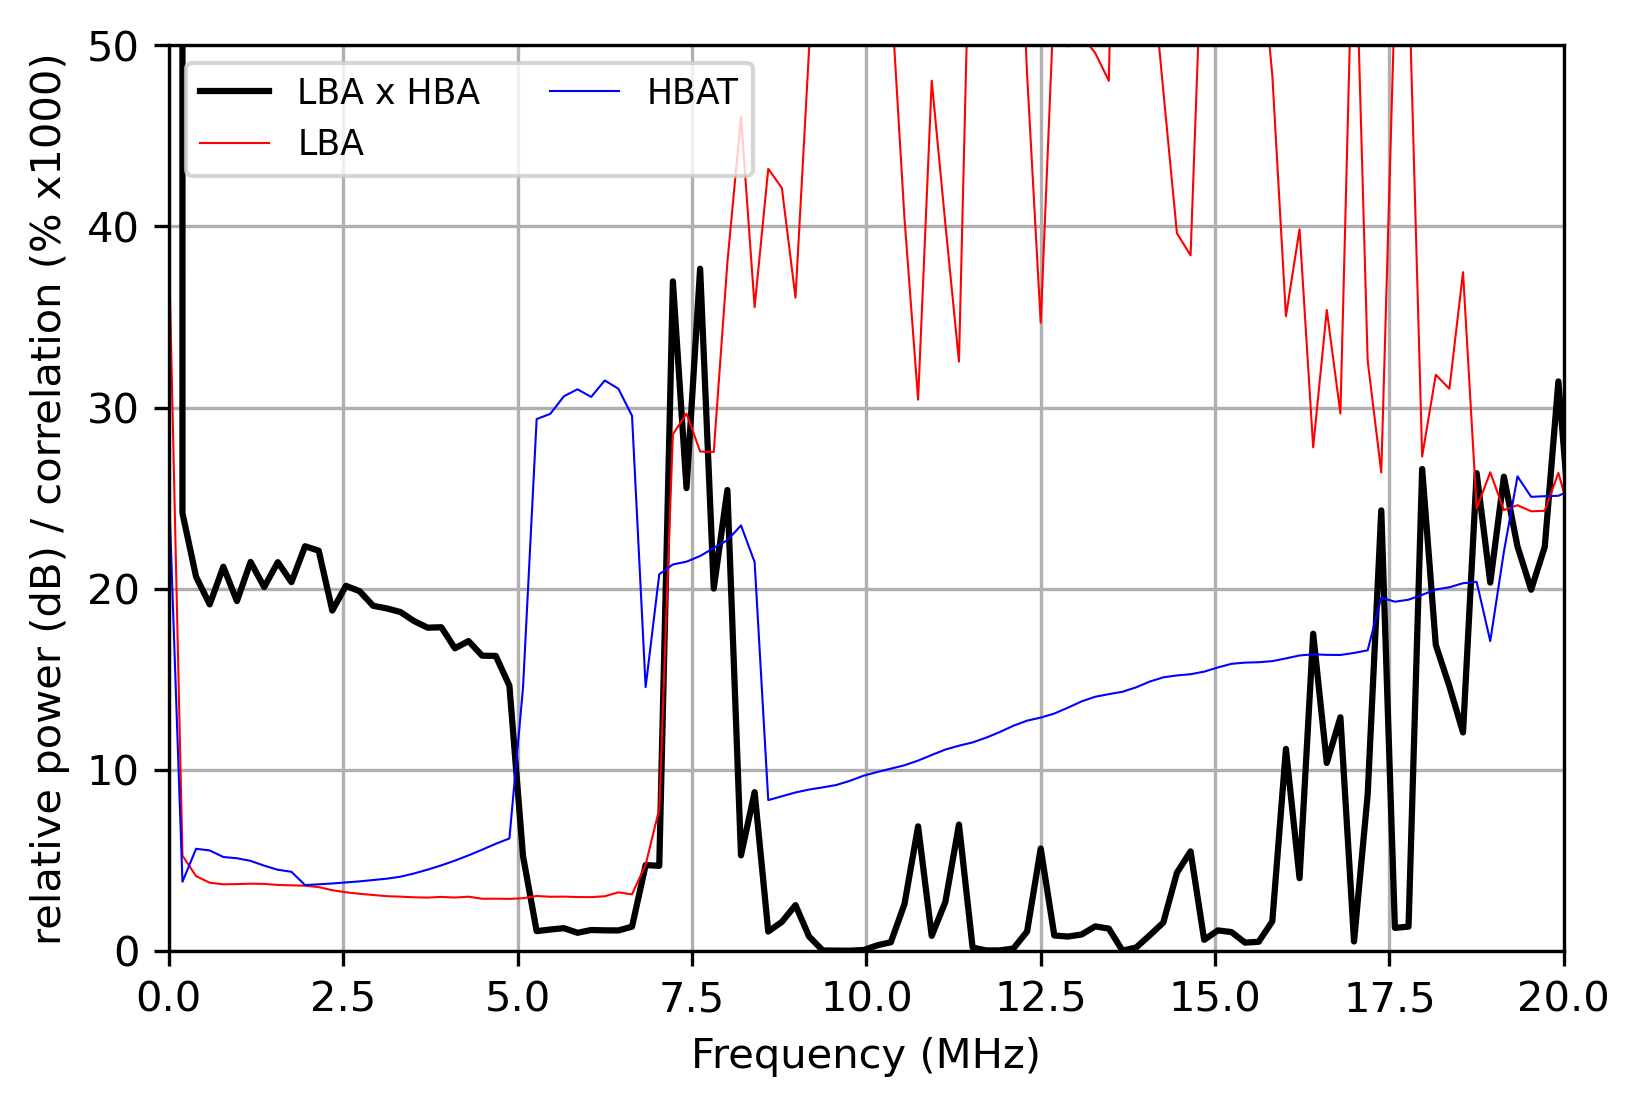

In [37]:
freqL=np.arange(512)/512*100
plt.figure(dpi=300)
plt.plot(freq,1e5*Ct,'k-',label='LBA x HBA')
for i1 in SisL[:1]:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i1,i1],-0)+1e-6)-55,'r-',label='LBA',linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
for i1 in SisH[:1]:
    plt.plot(freqL,P2dB(np.roll(D1b[:,i1,i1],-0)+1e-6)-60,'b-',label='HBAT',linewidth=0.5)

plt.legend(fontsize='small',ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
plt.xlim(0,20)
plt.ylim(0,50)
plt.xlabel("Frequency (MHz)")
plt.ylabel("relative power (dB) / correlation (% x1000)")
plt.grid()

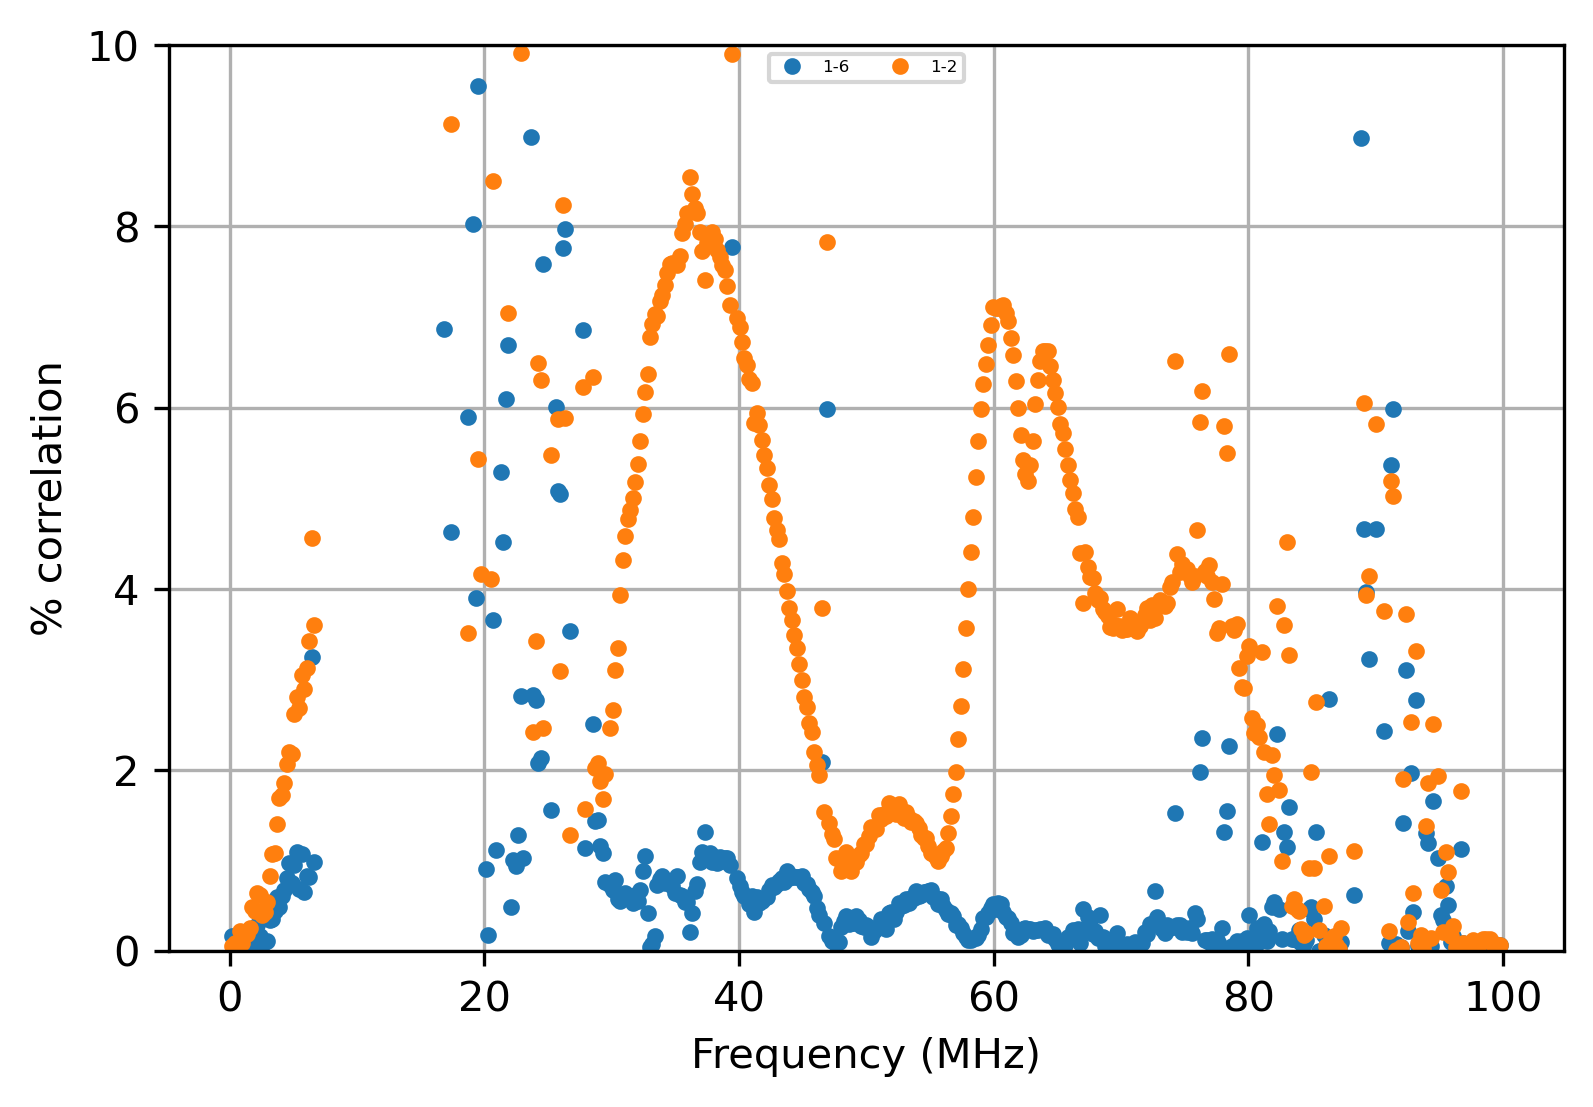

In [297]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs[:]):
    i1=p1*2
    i2=p2*2
    plt.plot(freq[1:],100*np.abs(np.roll(D1b[:,i2,i1]/np.sqrt(D1b[:,i2,i2]*D1b[:,i1,i1]),-0)+1e-6)[1:],'.',label='%i-%i'%(Sis[p1],Sis[p2]),linewidth=0.5)
#plt.gca().set_prop_cycle(None)
#for i,[p1,p2] in enumerate(pairs[2:8]):
#    plt.plot(freq[1:],P2dB(np.roll(D2b[:,p2,p1],-0)+1e-6)[1:],'-',linewidth=0.5)
plt.ylim(-1,120)
plt.legend(fontsize=4,ncol=2)
#plt.ylim(55,75)
#plt.xlim(30,70)
#plt.xlim(20,30)
plt.ylim(0,10)
plt.xlabel("Frequency (MHz)")
plt.ylabel("% correlation");plt.grid()

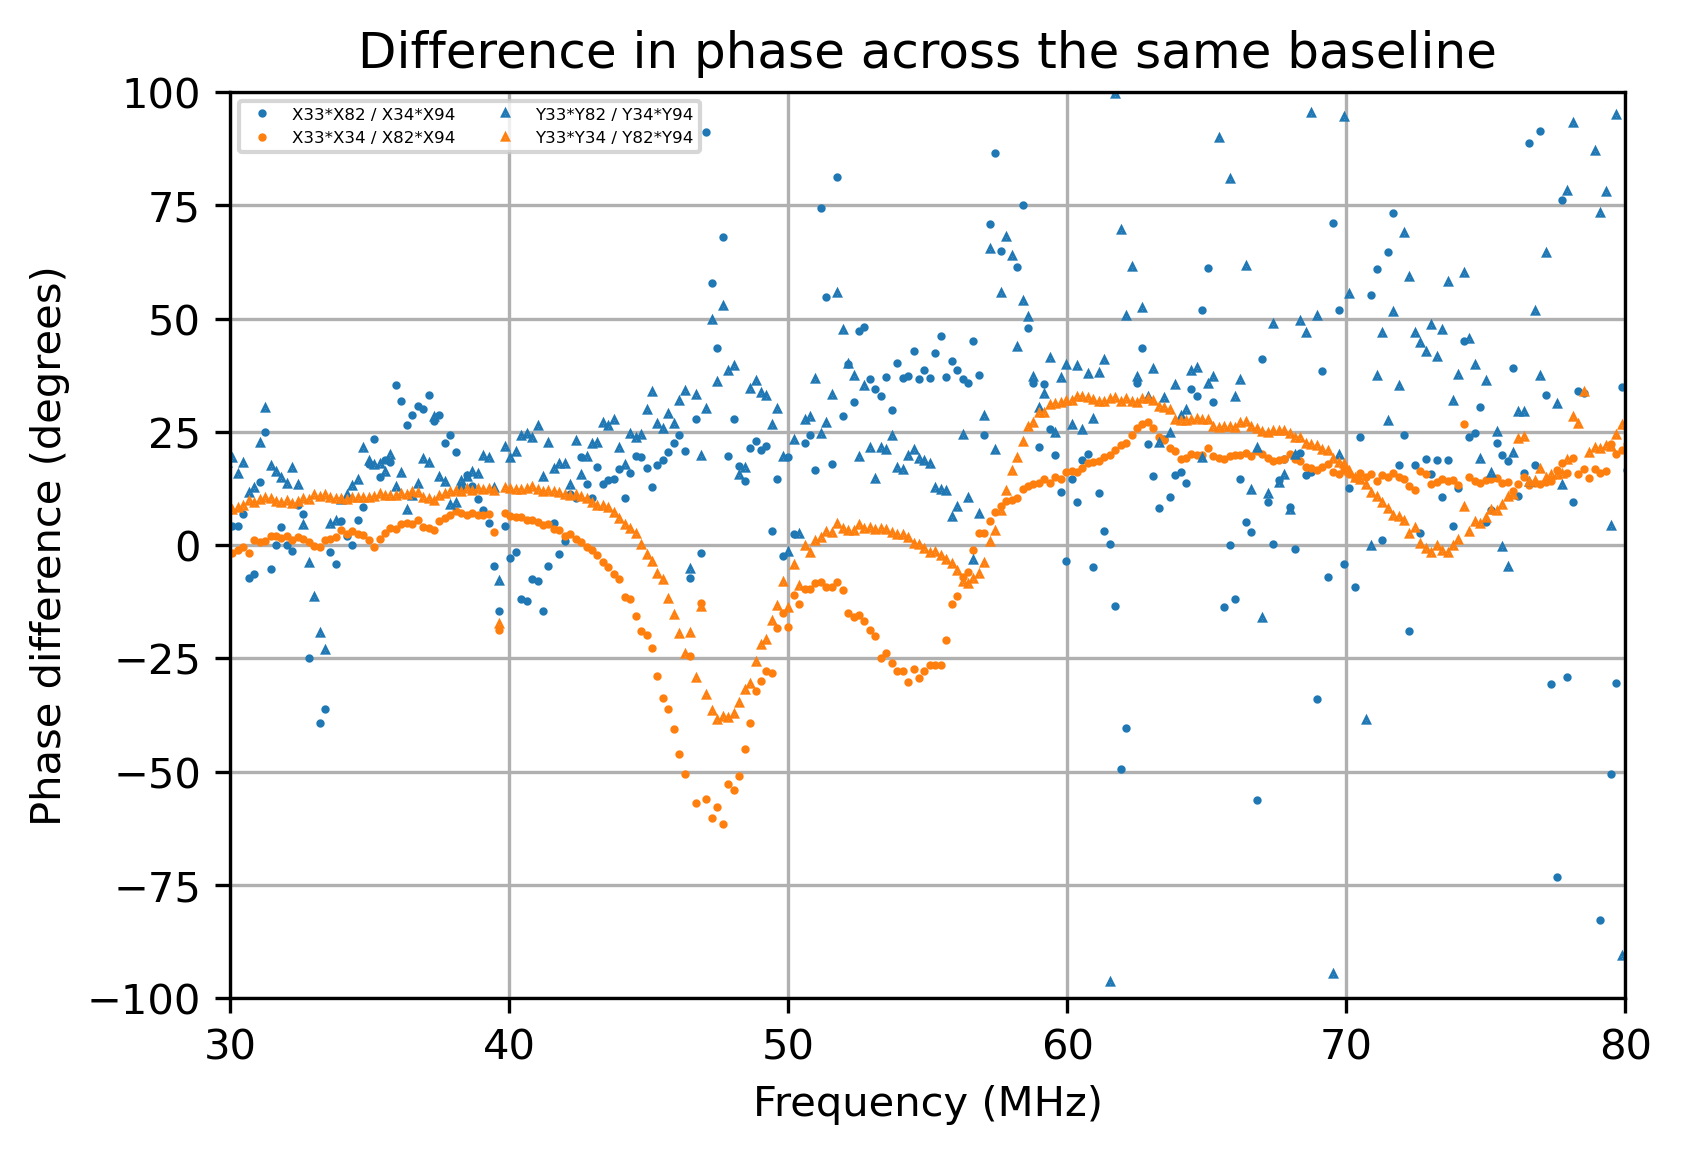

In [298]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2,p1*2]#*(corrX[p1]/corrX[p2])
    corr2=D1b[:,p4*2,p3*2]#*(corrX[p3]/corrX[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'.',label='X%i*X%i / X%i*X%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=2)
plt.gca().set_prop_cycle(None)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2+1,p1*2+1]#*(corrY[p1]/corrY[p2])
    corr2=D1b[:,p4*2+1,p3*2+1]#*(corrY[p3]/corrY[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'^',label='Y%i*Y%i / Y%i*Y%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=1)

plt.legend(fontsize=4,ncol=2)
plt.ylim(-100,100)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase difference (degrees)")
plt.title('Difference in phase across the same baseline')
plt.grid()

(9, 512)


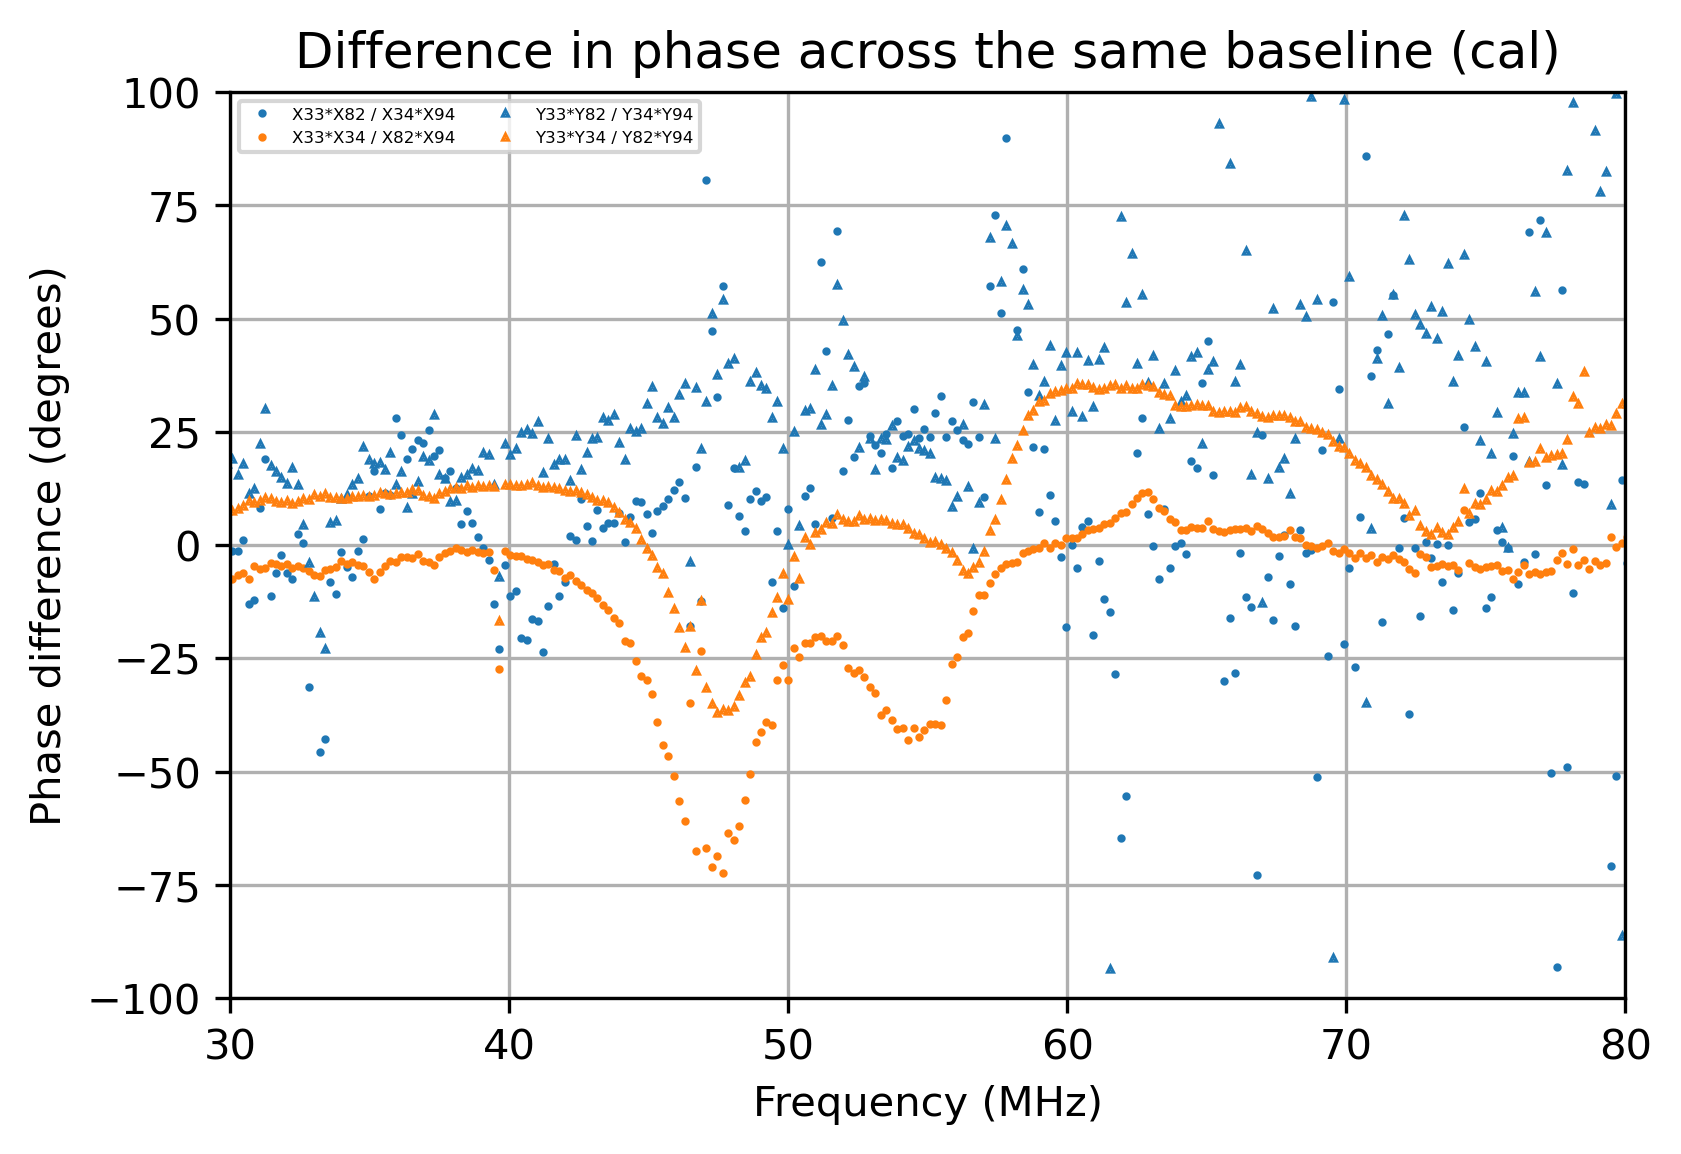

In [299]:
freq=np.arange(512)/512*100
corrX=np.exp(2j*np.pi*freq[np.newaxis,:]*(Calibration_Delay_Samples/200-Xdelay_ns/1e3)[:,np.newaxis]+2j*np.pi*XA0_deg[:,np.newaxis]/360)
corrY=np.exp(2j*np.pi*freq[np.newaxis,:]*(Calibration_Delay_Samples/200-Ydelay_ns/1e3)[:,np.newaxis]+2j*np.pi*YA0_deg[:,np.newaxis]/360)
print(corrX.shape)
plt.figure(dpi=300)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2,p1*2]/(corrX[p1]/corrX[p2])
    corr2=D1b[:,p4*2,p3*2]/(corrX[p3]/corrX[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'.',label='X%i*X%i / X%i*X%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=2)
plt.gca().set_prop_cycle(None)
for i,[p1,p2,p3,p4] in enumerate(pairs):
    corr1=D1b[:,p2*2+1,p1*2+1]/(corrY[p1]/corrY[p2])
    corr2=D1b[:,p4*2+1,p3*2+1]/(corrY[p3]/corrY[p4])
    plt.plot(freq,np.angle(corr1/corr2)/np.pi*180,'^',label='Y%i*Y%i / Y%i*Y%i'%(LBAs[p1],LBAs[p2],LBAs[p3],LBAs[p4]),linewidth=1,markersize=1)

plt.legend(fontsize=4,ncol=2)
plt.ylim(-100,100)
plt.xlim(30,80)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Phase difference (degrees)")
plt.title('Difference in phase across the same baseline (cal)')
plt.grid()